# Forschungsdaten des  Hamburger Zentrum für Sprachkorpora (HZSK)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   [Publikation von Forschungsdaten im Zeitverlauf](#2.1)
   
   [Entstehungszeit der Ressourcen](#2.4)

   [Sprachverteilung](#2.3)

   [Verteilung der Publisher](#2.5)

   [Lizenzverteilung]

   [Verteilung des Ressourcentyps]


3. [Word Clouds](#3)
   
   [Häufige Titelbegriffe](#3.1)

   [Urheberschaft]
   
   [Beschreibung der Ressource](#3.2)
   
   [Thema der Ressource](#3.3)
   
   4. [Bi- und multivariate Plots](#4)


<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [1]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:

# Erstellen des 1. DataFrames
data_hzsk = pd.read_csv(r'../../data/refined/clarin/hzsk/hzsk-records-20240620_refined.csv')

# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_hzsk_grouped = data_hzsk.copy()
data_hzsk_grouped['record id'] = data_hzsk_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record identifier
data_hzsk_grouped = data_hzsk_grouped.groupby('record id').agg({
    'datestamp': 'first',  
    'subject': lambda x: '; '.join(x.dropna().unique()),  # Einzigartige Werte zusammenführen
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'contributor': lambda x: '; '.join(x.dropna().unique()),  
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()),  
    'relation': lambda x: '; '.join(x.dropna().unique()),  
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),  
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'source': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),  
    'record - header - setSpec': lambda x: '; '.join(x.dropna().unique()),  
    'record id': lambda x: '; '.join(x.dropna().unique())  
}).reset_index(drop=True)

data_hzsk_grouped.replace('', 'NA', inplace=True)
data_hzsk_grouped.fillna('NA', inplace=True)

# Transformieren von 'datestamp' und 'date' zu datetime objects
data_hzsk_grouped[['date', 'datestamp']] = data_hzsk_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_hzsk[['date', 'datestamp']] = data_hzsk[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_hzsk_grouped.head(15)


,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record - header - setSpec,record id
0,2020-07-03 13:17:23+00:00,3d model; 3d scan; palmea raphia-spec; herbari...,https://zenodo.org/record/1000; 10.25592/uhhfd...,"Meuser, John; Schwenn, Fabian; Dominic Korte; ...",NA,other; dataset,other; dataset,OA; CC BY NC SA,doi:10.25592/uhhfdm.991,2020-05-27 00:00:00+00:00,3D Model of Palmea Raphia-spec,3D Model of Palmea Raphia-spec,deu,NA,NA,NA,oai:fdr.uni-hamburg.de:1000
1,2022-05-03 08:50:21+00:00,land degradation; sustainable intensification;...,https://zenodo.org/record/10001; 10.25592/uhhf...,"Lüdeling, Eike","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Landdegradierung kann mit verschiedenen Ma...,Maßnahmen gegen Landdegradierung,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-klima; user-uhh,oai:fdr.uni-hamburg.de:10001
2,2022-05-03 08:50:34+00:00,mangroves; coastal vegetation; climate change-...,https://zenodo.org/record/10003; 10.25592/uhhf...,"Zimmer, Martin","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Schutz von Mangroven und Küstenvegetation ...,Der Schutz von Mangroven und Küstenvegetation ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-klima; user-uhh,oai:fdr.uni-hamburg.de:10003
3,2022-05-03 08:50:16+00:00,carbon storage; climate engineering; irrigated...,https://zenodo.org/record/10005; 10.25592/uhhf...,"Branch, Oliver; Wulfmeyer,Volker","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Weltweit gibt es bis zu 1 Milliarde Hektar küs...,Kohlenstoffspeicherung und regionales Climate ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-klima; user-uhh,oai:fdr.uni-hamburg.de:10005
4,2022-05-03 08:50:17+00:00,bioenergy; climate protection; world nutrition...,https://zenodo.org/record/10007; 10.25592/uhhf...,"Fehrenbach, Horst","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,Der Beitrag beleuchtet die Rolle der Bioenergi...,Potentiale von Bioenergie für den Klimaschutz ...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-klima; user-uhh,oai:fdr.uni-hamburg.de:10007
5,2022-05-03 08:50:17+00:00,terra preta; climate protection; recycling of ...,https://zenodo.org/record/10009; 10.25592/uhhf...,"Glaser, Bruno","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,"Terra Preta ist ein alter Siedlungsboden, gepr...",Terra Preta – Entstehung und Rolle für Klimasc...,deu,NA,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-klima; user-uhh,oai:fdr.uni-hamburg.de:10009
6,2020-08-14 09:36:35+00:00,3d model; 3d scan; eye mirror; medical device;...,https://zenodo.org/record/1001; 10.25592/uhhfd...,"Meuser, John; Schwenn, Fabian; Dominic Korte; ...",NA,other; dataset,other; dataset,OA; CC BY NC SA,doi:10.25592/uhhfdm.987,2020-05-27 00:00:00+00:00,3D Model of an Eye Mirror medical device - par...,3D Model of an Eye Mirror medical device - par...,deu,NA,NA,NA,oai:fdr.uni-hamburg.de:1001
7,2022-05-03 08:50:18+00:00,reforestation/afforestation; local- & far-reac...,https://zenodo.org/record/10011; 10.25592/uhhf...,"Pongratz, Julia; Winckler, Johannes; Havermann...","Lozán, José L.; Breckle, Siegmar-W.; Graßl, Ha...",book part; section,text,OA; CC BY,info:eu-repo/semantics/altIdentifier/doi/10.25...,2021-12-01 00:00:00+00:00,"Die große Mehrzahl der Emissionspfade, die die...",Lokale und weitreichende Klimaeffekt

In [3]:
data_hzsk_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     3394 non-null   object             
 2   identifier                  3394 non-null   object             
 3   creator                     3394 non-null   object             
 4   contributor                 3394 non-null   object             
 5   type                        3394 non-null   object             
 6   type - dcmi recommendation  3394 non-null   object             
 7   rights                      3394 non-null   object             
 8   relation                    3394 non-null   object             
 9   date                        3388 non-null   datetime64[ns, UTC]
 10  description                 3394 non-null   object          

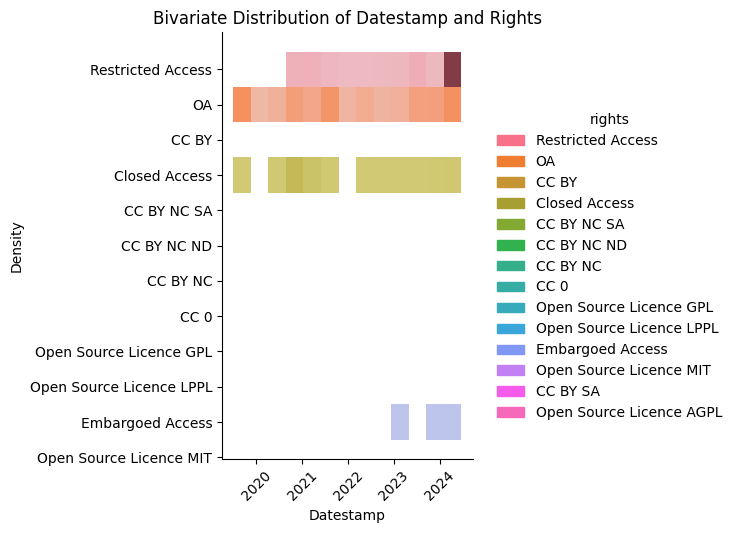

In [4]:
sns.displot(data=data_hzsk, x='datestamp', y = 'rights', hue='rights')

# Customize the plot
plt.title('Bivariate Distribution of Datestamp and Rights')
plt.xlabel('Datestamp')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

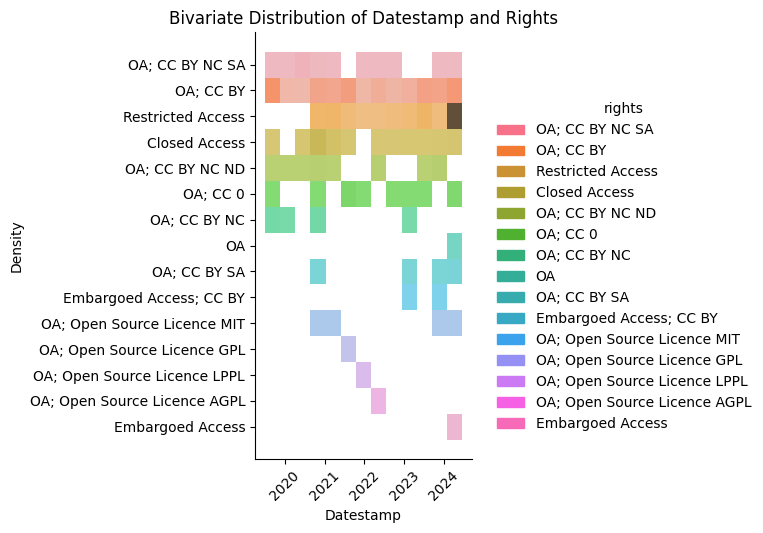

In [5]:
sns.displot(data=data_hzsk_grouped, x='datestamp', y = 'rights', hue='rights')

# Customize the plot
plt.title('Bivariate Distribution of Datestamp and Rights')
plt.xlabel('Datestamp')
plt.ylabel('Density')
plt.xticks(rotation=45)
plt.show()

In [7]:
viridis_palette = sns.color_palette("viridis_r", 12)
viridis_hex = viridis_palette.as_hex()
print(viridis_hex)
sns.color_palette('viridis_r', 12)


['#cde11d', '#98d83e', '#67cc5c', '#40bd72', '#25ac82', '#1f998a', '#24878e', '#2b748e', '#34618d', '#3d4d8a', '#453581', '#481c6e']


[(0.804182, 0.882046, 0.114965),
 (0.595839, 0.848717, 0.243329),
 (0.404001, 0.800275, 0.362552),
 (0.252899, 0.742211, 0.448284),
 (0.146616, 0.67305, 0.508936),
 (0.120092, 0.600104, 0.54253),
 (0.140536, 0.530132, 0.555659),
 (0.169646, 0.456262, 0.55803),
 (0.203063, 0.379716, 0.553925),
 (0.239346, 0.300855, 0.540844),
 (0.271828, 0.209303, 0.504434),
 (0.283091, 0.110553, 0.431554)]

In [8]:
data_hzsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21999 entries, 0 to 21998
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     15343 non-null  object             
 2   identifier                  10182 non-null  object             
 3   creator                     8240 non-null   object             
 4   contributor                 6883 non-null   object             
 5   type                        6649 non-null   object             
 6   type - dcmi recommendation  6648 non-null   object             
 7   rights                      5135 non-null   object             
 8   relation                    4436 non-null   object             
 9   date                        3394 non-null   datetime64[ns, UTC]
 10  description                 3393 non-null   object        

In [9]:
data_hzsk_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3394 entries, 0 to 3393
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   3394 non-null   datetime64[ns, UTC]
 1   subject                     3394 non-null   object             
 2   identifier                  3394 non-null   object             
 3   creator                     3394 non-null   object             
 4   contributor                 3394 non-null   object             
 5   type                        3394 non-null   object             
 6   type - dcmi recommendation  3394 non-null   object             
 7   rights                      3394 non-null   object             
 8   relation                    3394 non-null   object             
 9   date                        3388 non-null   datetime64[ns, UTC]
 10  description                 3394 non-null   object          

In [10]:
data_hzsk.head()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record - header - setSpec,record id
0,2021-05-20 21:26:13+00:00,dfg-ha2323-14-1,https://zenodo.org/record/1212,"Engelkes, Karolin",NaN,other,other,Restricted Access,doi:10.1002/ece3.6784,2020-07-13 00:00:00+00:00,Species: Discoglossus montalentii Collection n...,"Discoglossus montalentii ZSM 1299/2006, unstai...",eng,NaN,NaN,user-uhh,oai:fdr.uni-hamburg.de:1212
1,NaT,387723284,10.25592/uhhfdm.1212,"Haas, Alexander",NaN,dataset,dataset,NaN,doi:10.25592/uhhfdm.1211,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,discoglossus,oai:fdr.uni-hamburg.de:1212,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,montalentii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,anura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data_hzsk.describe()

,datestamp,subject,identifier,creator,contributor,type,type - dcmi recommendation,rights,relation,date,description,title,language,source,publisher,record - header - setSpec,record id
count,3394,15343,10182,8240,6883,6649,6648,5135,4436,3394,3393,3393,2428,371,272,3861,3394
unique,NaN,4235,10182,1584,1641,23,6,14,3724,NaN,3154,3088,34,346,9,21,3394
top,NaN,csmc,https://zenodo.org/record/1212,NCAC/RDD,"Lozán, José L.",other,other,OA,doi:10.1002/ece3.6784,NaN,Screencast eines interaktiv-partizipativen Dok...,Front Matter,mnk,Comparative Oriental Manuscript Studies Bullet...,"Verlag Wissenschaftliche Auswertungen, GEO Mag...",user-uhh,oai:fdr.uni-hamburg.de:1212
freq,NaN,282,1,1082,247,2536,2536,1748,69,NaN,19,16,959,5,261,2320,1
mean,2022-10-19 20:27:47.802887680+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-02 18:52:48.446670336+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-07-01 13:38:19+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1992-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-05-20 21:24:42.500000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-05-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2023-08-04 06:44:38+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-18 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-05-06 09:27:23.750000128+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-24 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-19 13:33:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_hzsk.columns

Index(['datestamp', 'subject', 'identifier', 'creator', 'contributor', 'type',
       'type - dcmi recommendation', 'rights', 'relation', 'date',
       'description', 'title', 'language', 'source', 'publisher',
       'record - header - setSpec', 'record id'],
      dtype='object')

<a id="2"></a>
## 2 Univariate Plots

[Zurück zum Anfang](#0)

- datestamp
- date
- language
- publisher
- rights
- type

<a id="2.1"></a>
### Publikation von Forschungsdaten im Zeitverlauf
[Zurück zum Anfang](#0)

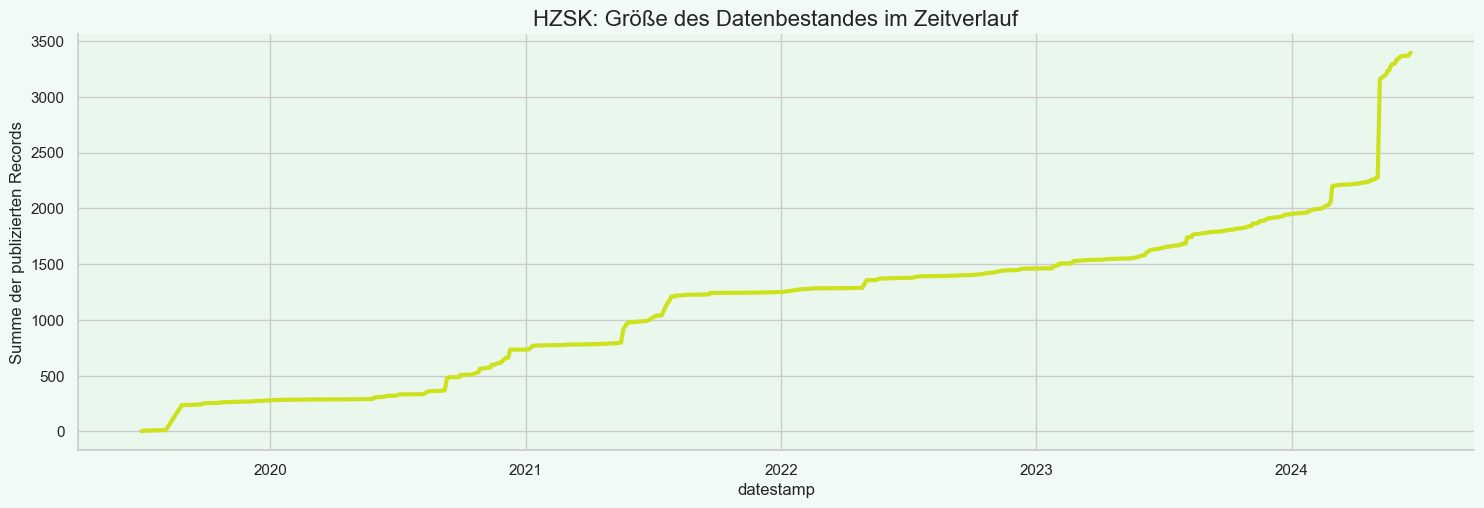

frühster Datestamp: 2019-07-01 13:38:19+00:00 ; spätester Datestamp: 2024-06-19 13:33:49+00:00


In [33]:
daily_counts = data_hzsk.groupby(data_hzsk['datestamp'].dt.date).size().reset_index(name='count')# Gruppieren und Zählen der Records nach Datum
daily_counts['cumulative_count'] = daily_counts['count'].cumsum() # Berechnen der kumulativen Summe


sns.set_style('whitegrid', {'axes.facecolor':'#e9f7ed', 'figure.facecolor': '#f2faf5' }) # Style des Plots anpassen

# Plot der kumulativen Summe der Records über die Zeit
sns.relplot(daily_counts, x='datestamp', y='cumulative_count', kind='line', aspect=3, errorbar = None, color='#cde11d', linewidth=3)


plt.title('HZSK: Größe des Datenbestandes im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Summe der publizierten Records', fontsize=12)
# plt.xticks(rotation=45) 
plt.show()

print('frühster Datestamp:', data_hzsk['datestamp'].min(), '; spätester Datestamp:', data_hzsk['datestamp'].max())


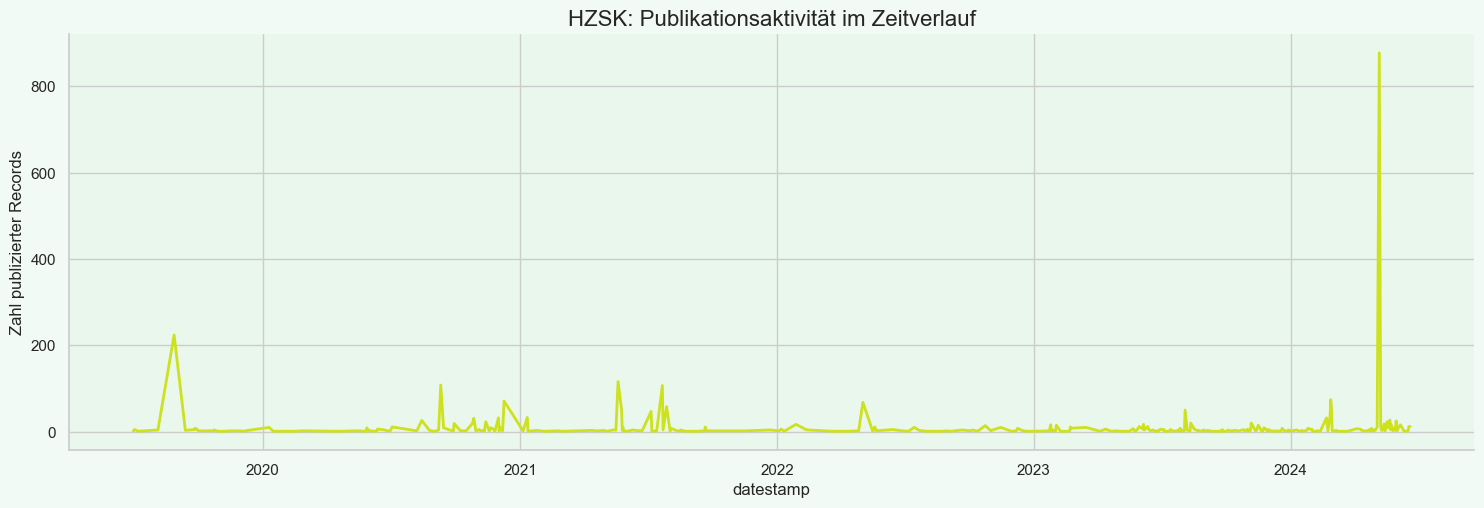

frühster Datestamp: 2019-07-01 13:38:19+00:00 ; spätester Datestamp: 2024-06-19 13:33:49+00:00


In [38]:
# verwendet daily_counts = gruppierte Records nach datestamp

#sns.set_style('whitegrid', {'axes.facecolor':'#e9f7ed', 'figure.facecolor': '#f2faf5' }) # Style des Plots anpassen

sns.relplot(data=daily_counts, x='datestamp', y='count', kind='line', color='#cde11d', aspect=3, linewidth=2) 

plt.title('HZSK: Publikationsaktivität im Zeitverlauf', fontsize=16)
plt.xlabel('datestamp', fontsize=12)
plt.ylabel('Zahl publizierter Records', fontsize=12)

# Show the plot
plt.show()
print('frühster Datestamp:', data_hzsk['datestamp'].min(), '; spätester Datestamp:', data_hzsk['datestamp'].max())

### 2.4 Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

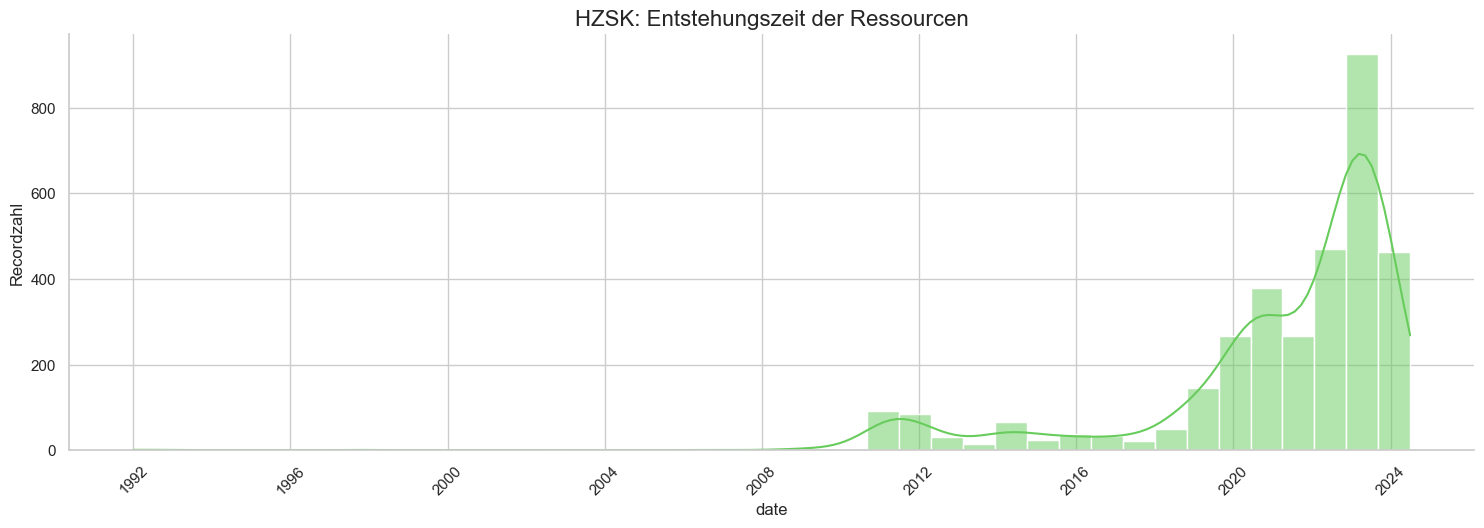

frühstes Datum: 1992-01-01 00:00:00+00:00 ; spätestes Datum: 2024-07-01 00:00:00+00:00


In [15]:

sns.set_style('whitegrid')
sns.displot(data_hzsk, x='date', bins=40, kde=True, color = '#67cc5c', aspect=3) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.xticks(rotation=45)
plt.title('HZSK: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.show()
print('frühstes Datum:', data_hzsk['date'].min(), '; spätestes Datum:', data_hzsk['date'].max())

<a id="2.3"></a>
### Sprachverteilung

[Zurück zum Anfang](#0)

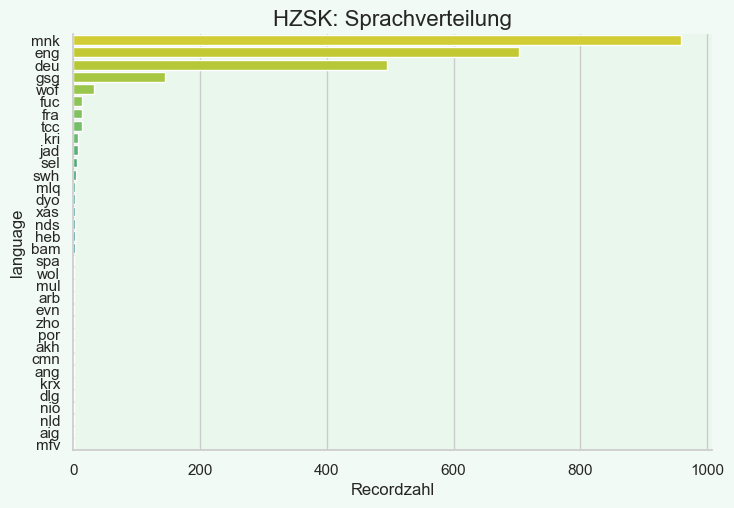

In [41]:
# Reihenfolge der Werte festlegen
order = data_hzsk['language'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['language'] = pd.Categorical(data_hzsk['language'], categories=order, ordered=True)

sns.catplot(data_hzsk, y = 'language', kind = 'count', aspect = 1.5, hue = 'language', palette = 'viridis_r', legend=False)

plt.title('HZSK: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)#
plt.xlabel('Recordzahl', fontsize=12)
plt.show()

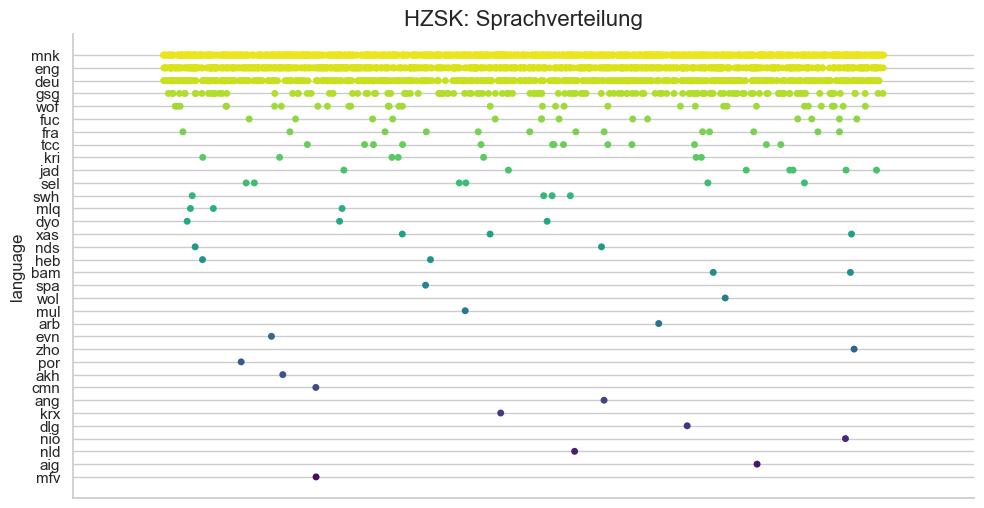

In [17]:

# Reihenfolge der Werte festlegen
order = data_hzsk['language'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_hzsk['language'] = pd.Categorical(data_hzsk['language'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'language', aspect = 2, hue = 'language', palette="viridis_r", jitter=0.4, legend=False) # Sprachverteilung mit erhöhtem Jitter

plt.title('HZSK: Sprachverteilung', fontsize=16)
plt.ylabel('language', fontsize=12)
plt.show()

<a id="2.5"></a>
### 2.5 Verteilung der Publisher

[Zurück zum Anfang](#0)

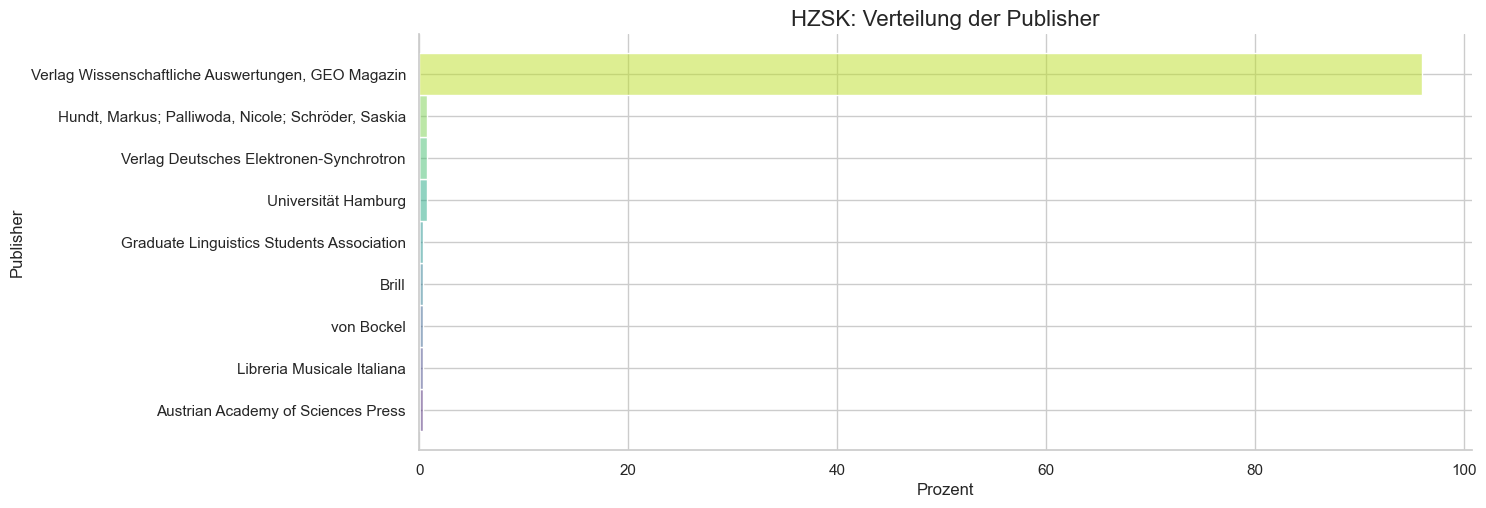

In [44]:
# Reihenfolge der Werte festlegen
order = data_hzsk['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['publisher'] = pd.Categorical(data_hzsk['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_hzsk, y = 'publisher', aspect = 3, hue='publisher', palette="viridis_r", legend=False, stat = 'percent')



plt.title('HZSK: Verteilung der Publisher', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()

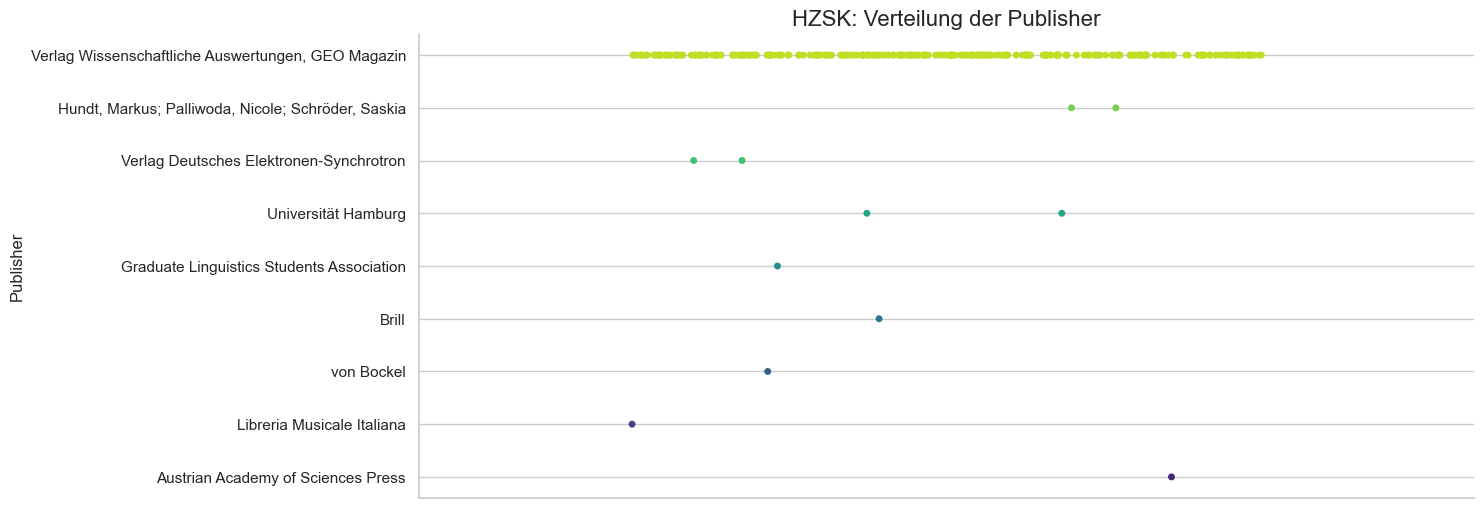

In [46]:
# Reihenfolge der Werte festlegen
order = data_hzsk['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_hzsk['publisher'] = pd.Categorical(data_hzsk['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.catplot(data_hzsk, y = 'publisher', aspect = 3, hue='publisher', palette="viridis_r", jitter=0.3, legend=False) # Verteilung der Publisher mit erhöhtem Jitter



plt.title('HZSK: Verteilung der Publisher', fontsize=16)
plt.ylabel('Publisher', fontsize=12)
plt.show()

<a id="2.6"></a>
### 2.6 Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

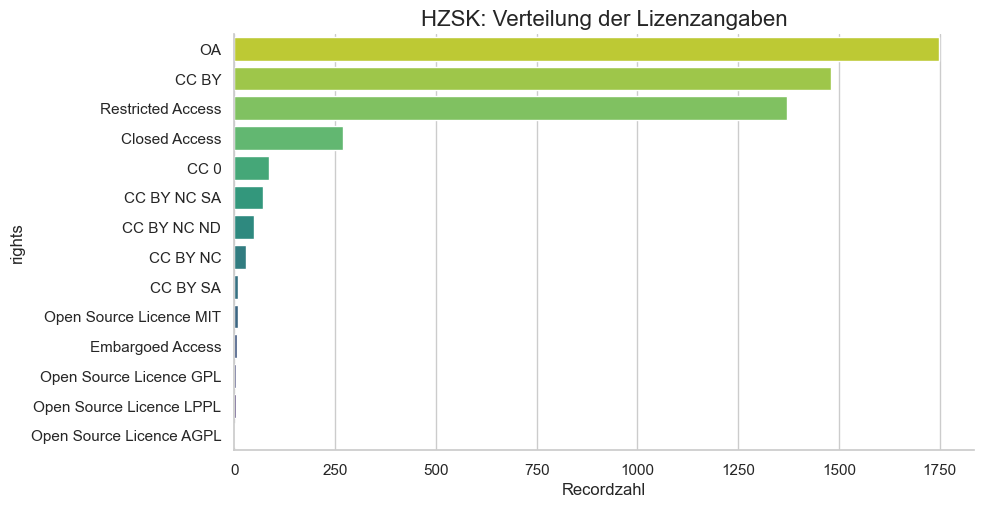

In [20]:
order = data_hzsk['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['rights'] = pd.Categorical(data_hzsk['rights'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="viridis_r", legend=False)

plt.title('HZSK: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Recordzahl', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.show()

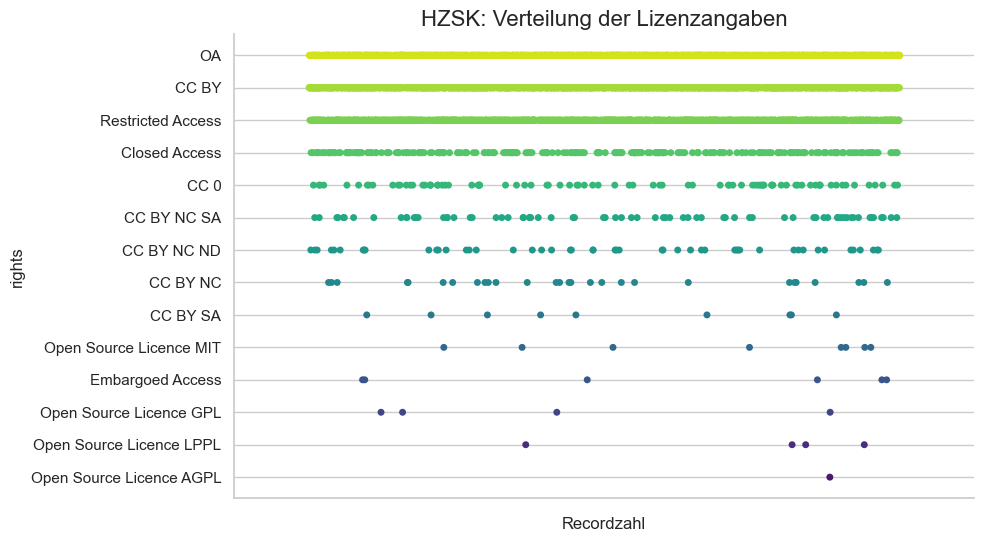

In [21]:
order = data_hzsk['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['rights'] = pd.Categorical(data_hzsk['rights'], categories=order, ordered=True)


sns.catplot(data_hzsk, y = 'rights', aspect = 2, hue = 'rights', palette="viridis_r", jitter=0.4,legend=False)

plt.title('HZSK: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Recordzahl', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.show()

<a id="2.7"></a>
### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

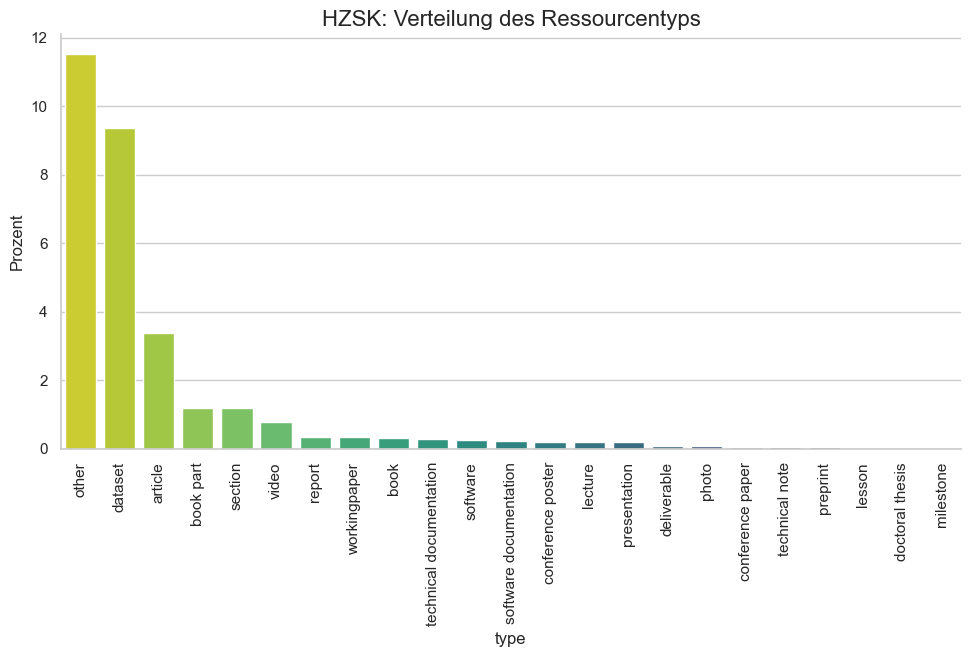

In [22]:
'Verteilung des Ressourcentyps wie vom HZSK angegeben'

# Reihenfolge der Werte festlegen
order_type = data_hzsk['type'].value_counts().index
# Konvertieren der Daten in kategorische Variablen
data_hzsk['type'] = pd.Categorical(data_hzsk['type'], categories=order_type, ordered=True)

sns.catplot(data_hzsk, x = 'type', kind = 'count', stat='percent', aspect = 2, hue = 'type', palette='viridis_r', legend=False)

plt.title('HZSK: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('type', fontsize=12)
plt.ylabel('Prozent', fontsize=12)

plt.xticks(rotation=90)
plt.show()

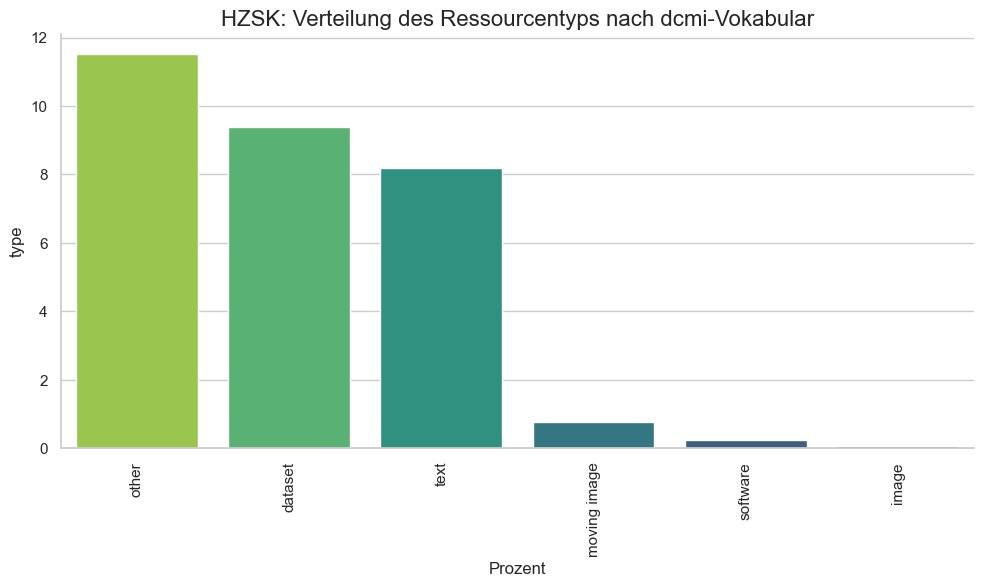

In [23]:


order_dcmi = data_hzsk['type - dcmi recommendation'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_hzsk['type - dcmi recommendation'] = pd.Categorical(data_hzsk['type - dcmi recommendation'], categories=order_dcmi, ordered=True)

sns.catplot(data_hzsk, x = 'type - dcmi recommendation', kind = 'count', stat='percent', aspect = 2, hue = 'type - dcmi recommendation', palette='viridis_r', legend=False)

plt.title('HZSK: Verteilung des Ressourcentyps nach dcmi-Vokabular', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.xticks(rotation=90)
plt.show()

<a id="3"></a>
## Word Clouds

[Zurück zum Anfang](#0)


***Untersuchte Variablen***
- title 
- creator
- contributor
- description
- subject
- source

<a id="3.1"></a>
### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

{'Interview': 1.0, 'History': 0.914780292942743, 'CT volume': 0.170439414114514, 'Kombo': 0.1584553928095872, 'Account on': 0.15446071904127828, '3D Model': 0.14647137150466044, 'unstained CT': 0.13049267643142476, 'Data': 0.12383488681757657, 'Clan': 0.12383488681757657, 'Manuscript': 0.11451398135818908, 'Brikama': 0.1051930758988016, 'de': 0.09720372836218376, 'Conference Report': 0.09587217043941411, 'Project': 0.07456724367509987, 'Busumbala': 0.07456724367509987, 'on': 0.07323568575233022, 'Kaabu': 0.0692410119840213, 'Gunjur': 0.06657789613848203, '3D Scan': 0.06524633821571238, 'M': 0.06391478029294274, 'X Ray': 0.06391478029294274, 'Ray Fluorescence': 0.06258322237017311, 'rNying ma': 0.06125166444740346, 'ma rgyud': 0.06125166444740346, 'rgyud bum': 0.06125166444740346, 'bum Vol': 0.06125166444740346, 'Kundaa': 0.05992010652463382, 'with': 0.05858854860186418, 'Wuli': 0.05858854860186418, 'Pirang': 0.05858854860186418, 'Dataset': 0.0559254327563249, 'Temporal Model': 0.051930

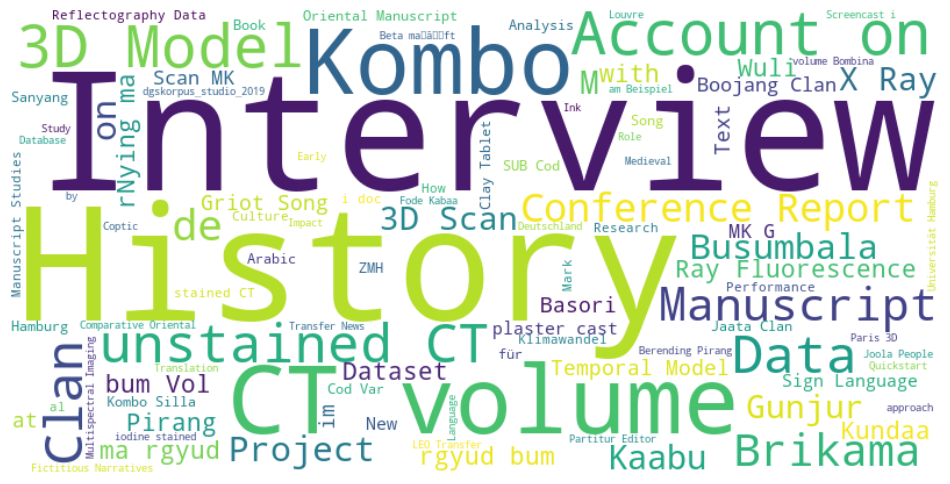

In [24]:

text_data = data_hzsk["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 
'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 
'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from', 'to']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.2"></a>
### Häufige Urheber*innennamen

[Zurück zum Anfang](#0)

{'RDD': 1.0, 'NCAC': 0.9990766389658357, 'Thomas': 0.30932594644506, 'König': 0.26685133887349954, 'Hanke': 0.20867959372114497, 'Konrad': 0.1791320406278855, 'Gabriele': 0.17174515235457063, 'Reiner': 0.17082179132040629, 'Langer': 0.17082179132040629, 'Lutz': 0.15143120960295475, 'Alexander': 0.1440443213296399, 'Stefan': 0.14127423822714683, 'Susanne': 0.1348107109879963, 'Haas': 0.13204062788550322, 'Christian': 0.12742382271468145, 'Wagner': 0.11542012927054478, 'Nishio': 0.11172668513388735, 'Rie': 0.11172668513388735, 'Engelkes': 0.11080332409972299, 'Karolin': 0.11080332409972299, 'Hong': 0.10895660203139428, 'Sung': 0.10895660203139428, 'Eun': 0.10895660203139428, 'Silke': 0.1061865189289012, 'Rathmann': 0.1061865189289012, 'Sven': 0.10526315789473684, 'Matthes': 0.10433979686057249, 'Hofmann': 0.10341643582640812, 'Ilona': 0.10341643582640812, 'Blanck': 0.10249307479224377, 'Dolly': 0.10249307479224377, 'Jeziorski': 0.10064635272391505, 'Olga': 0.10064635272391505, 'Uta': 0.0

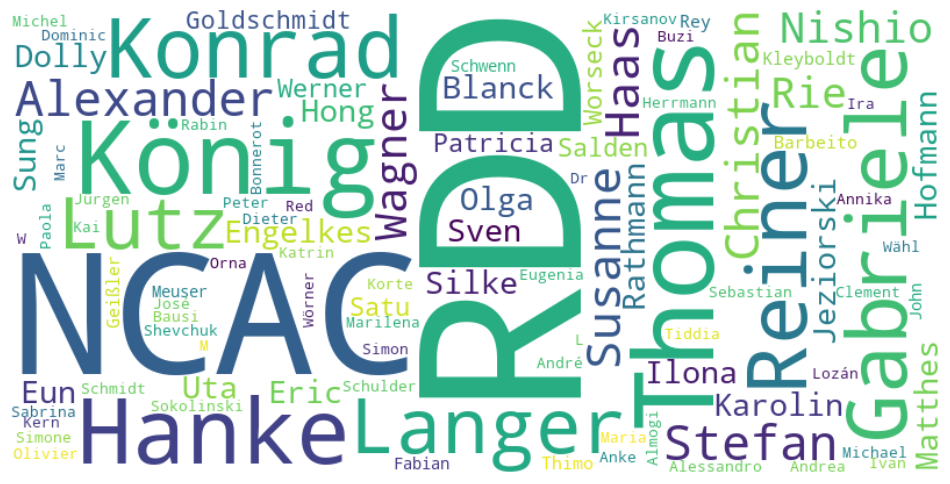

In [25]:

'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_hzsk["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.3"></a>
### Häufige Mitwirkende

[Zurück zum Anfang](#0)

{'José': 1.0, 'L': 0.9845559845559846, 'Lozán': 0.9536679536679536, 'Breckle': 0.9498069498069498, 'Siegmar': 0.9498069498069498, 'W': 0.9498069498069498, 'Graßl': 0.9498069498069498, 'Hartmut': 0.9459459459459459, 'König': 0.9420849420849421, 'Dieter': 0.7876447876447876, 'Kasang': 0.7837837837837838, 'Thomas': 0.5791505791505791, 'Hanke': 0.5521235521235521, 'Konrad': 0.5521235521235521, 'Reiner': 0.5521235521235521, 'Langer': 0.5521235521235521, 'Gabriele': 0.5521235521235521, 'Lutz': 0.5521235521235521, 'Stefan': 0.47104247104247104, 'Boojang': 0.4594594594594595, 'Alhaji': 0.4362934362934363, 'Wagner': 0.43243243243243246, 'Christian': 0.4092664092664093, 'Susanne': 0.40540540540540543, 'Satu': 0.4015444015444015, 'Hofmann': 0.3938223938223938, 'Silke': 0.3938223938223938, 'mod': 0.38996138996138996, 'Barbeito': 0.38996138996138996, 'Rey': 0.38996138996138996, 'Geißler': 0.38996138996138996, 'Patricia': 0.38996138996138996, 'Blanck': 0.38996138996138996, 'Dolly': 0.389961389961389

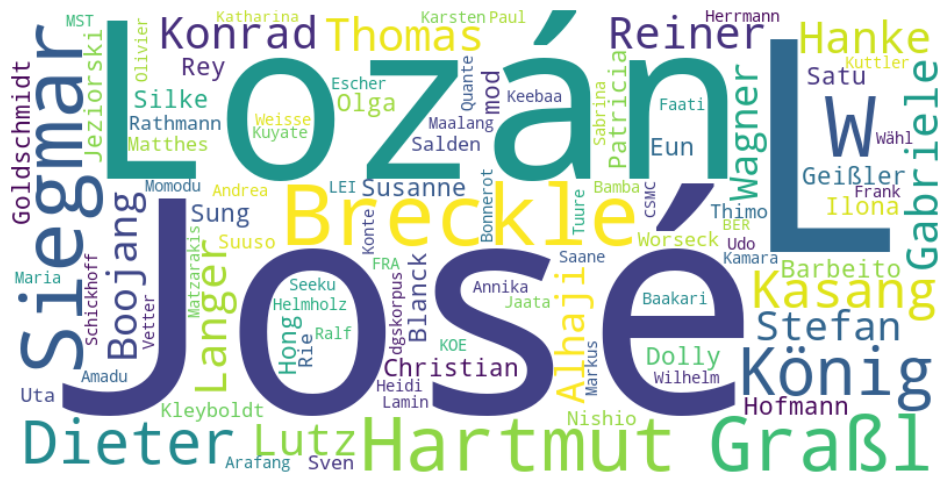

In [26]:
'Word Cloud aufgrund der Vielfalt der Personennamen schwer auszuwerten'

text_data = data_hzsk["contributor"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud
##

<a id="3.4"></a>
### Quellen

[Zurück zum Anfang](#0)

{'Manuscript': 1.0, 'Studies': 0.9558011049723757, 'Comparative': 0.9502762430939227, 'Oriental': 0.9502762430939227, 'Bulletin': 0.6933701657458563, 'Newsletter': 0.2569060773480663, 'January': 0.143646408839779, 'July': 0.11602209944751381, 'Proceedings': 0.04696132596685083, 'February': 0.04696132596685083, 'Workshop': 0.04419889502762431, 'Linking': 0.04419889502762431, 'Coptic': 0.04419889502762431, 'Ethiopian': 0.04419889502762431, 'Syriac': 0.04419889502762431, 'Domain': 0.04419889502762431, 'Present': 0.04419889502762431, 'Future': 0.04419889502762431, 'Synergy': 0.04419889502762431, 'Strategies': 0.04419889502762431, 'Hamburg': 0.04419889502762431, 'Journal': 0.013812154696132596, 'Management': 0.008287292817679558, 'Research': 0.008287292817679558, 'für': 0.008287292817679558, 'Ecology': 0.0055248618784530384, 'Evolution': 0.0055248618784530384, 'Cultures': 0.0055248618784530384, 'Business': 0.0055248618784530384, 'Zeitschrift': 0.0055248618784530384, 'Papyrologie': 0.0055248

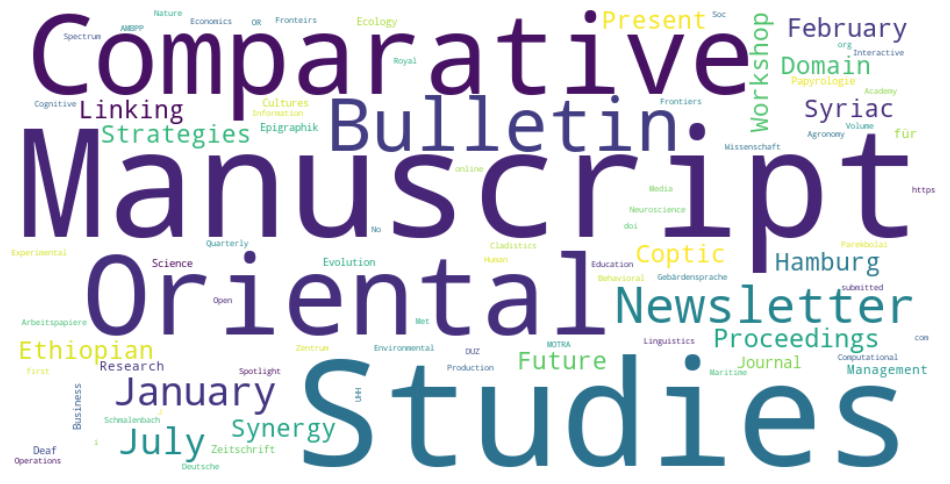

In [27]:
text_data = data_hzsk["source"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.5"></a>
### Thema der Ressource

[Zurück zum Anfang](#0)

{'manuscript studies': 1.0, 'open questions': 0.8559322033898306, 'written artefacts': 0.8516949152542372, 'consent open': 0.7923728813559322, '3d model': 0.7584745762711864, '3d scan': 0.6864406779661016, 'century ce': 0.6610169491525424, 'dfg ha2323': 0.6016949152542372, 'frog amphibia': 0.597457627118644, 'anura frog': 0.5847457627118644, 'amphibia computed': 0.538135593220339, 'computed tomography': 0.538135593220339, 'tomography ct': 0.538135593220339, 'model 3d': 0.4957627118644068, 'csmc uwa': 0.4703389830508475, 'procedures': 0.4279661016949153, 'project dfg': 0.4279661016949153, 'sign names': 0.4279661016949153, 'deaf individuals': 0.4279661016949153, 'calender task': 0.4279661016949153, 'what did': 0.4279661016949153, 'did you': 0.4279661016949153, 'you do': 0.4279661016949153, 'do when': 0.4279661016949153, 'when it': 0.4279661016949153, 'it happened': 0.4279661016949153, 'free conversation': 0.4279661016949153, 'isolated signs': 0.4279661016949153, 'prohibition signs': 0.42

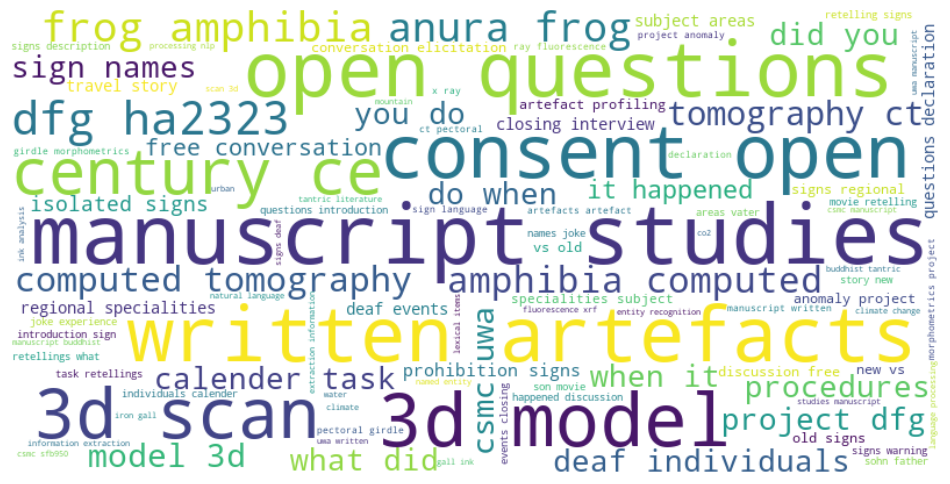

In [28]:
text_data = data_hzsk["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


<a id="3.6"></a>
### Beschreibung der Ressource

[Zurück zum Anfang](#0)

{'informant': 1.0, 'DGS': 0.9053820806527538, 'mov': 0.8098226894712066, 'Korpus': 0.7886395731994351, 'view': 0.7848736858622313, '1080i25': 0.5731994351168994, 'right': 0.47638474815628434, 'channel': 0.4352738113918092, 'left': 0.43386160364035775, 'stereoscopic': 0.43386160364035775, 'with': 0.43386160364035775, 'frontal': 0.4268005648831006, 'camera': 0.4114231915895183, 'Panasonic': 0.4092264239761494, 'B': 0.3663894555154558, 'on': 0.35399340969715987, 'i': 0.3122548250431508, 'data': 0.3039384905068257, 'de': 0.3033108426172917, 's': 0.24901930017260318, 'Thi': 0.24085987760866154, 'are': 0.22783618390083163, 'by': 0.22328573670171034, 'as': 0.2198336733092735, 'total': 0.21088969088341442, 'moderator': 0.20084732465087085, '720p50': 0.19378628589361369, 'name': 0.17103404989800722, 'at': 0.16883728228463832, 'Alternative': 0.15628432449395888, 'Hamburg': 0.1476541660128668, 'project': 0.14388827867566295, 'eye': 0.143260630786129, 'that': 0.143260630786129, 'bird': 0.139965479

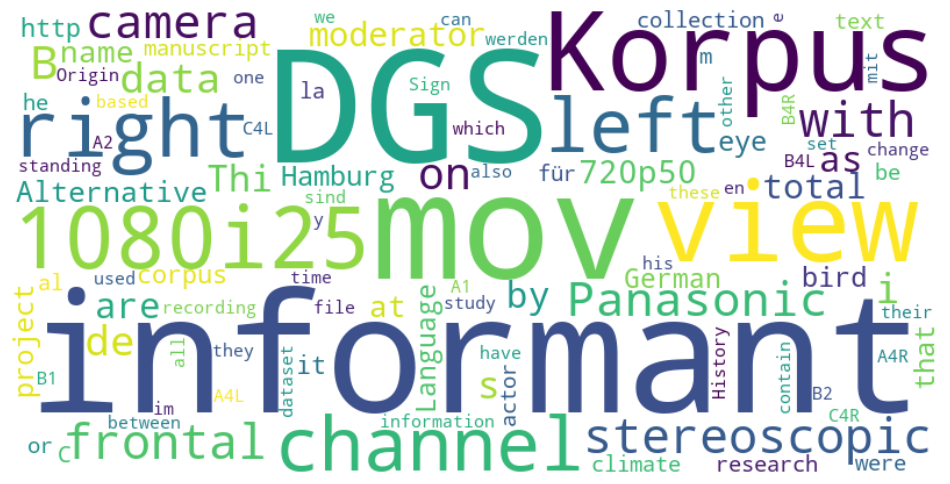

In [29]:
text_data = data_hzsk["description"].str.cat(sep=' ') # Werte werden als string zusammengefügt
#stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'zur', 'in', 'aus', 'vor', 'nach', 'and', 'about', 'the', 'of', 'an', 'a', 'for', 'from']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # Anzeige der Wordcloud


## Bi- und multivariate Plots

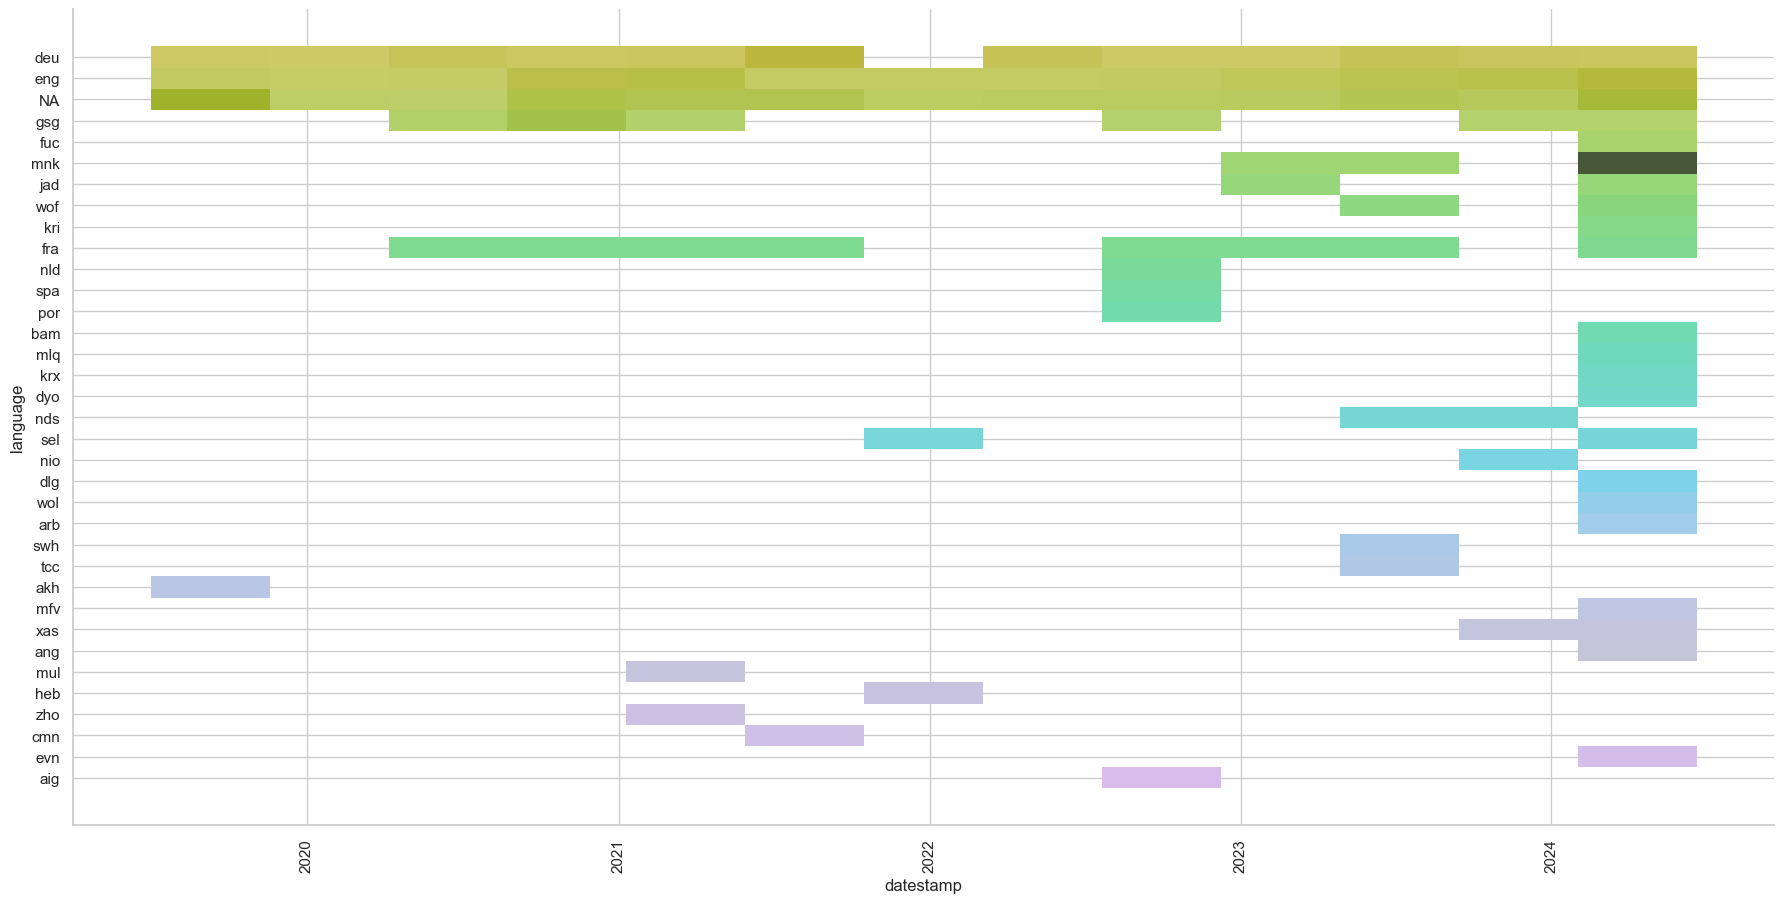

In [30]:
sns.displot(data_hzsk_grouped, x="datestamp", y="language", hue='language', aspect=2, height=9, palette='viridis_r', legend=False) # falsch, da reihenweise, nicht recordweise ausgewertet wird
plt.xticks(rotation=90)
plt.show()

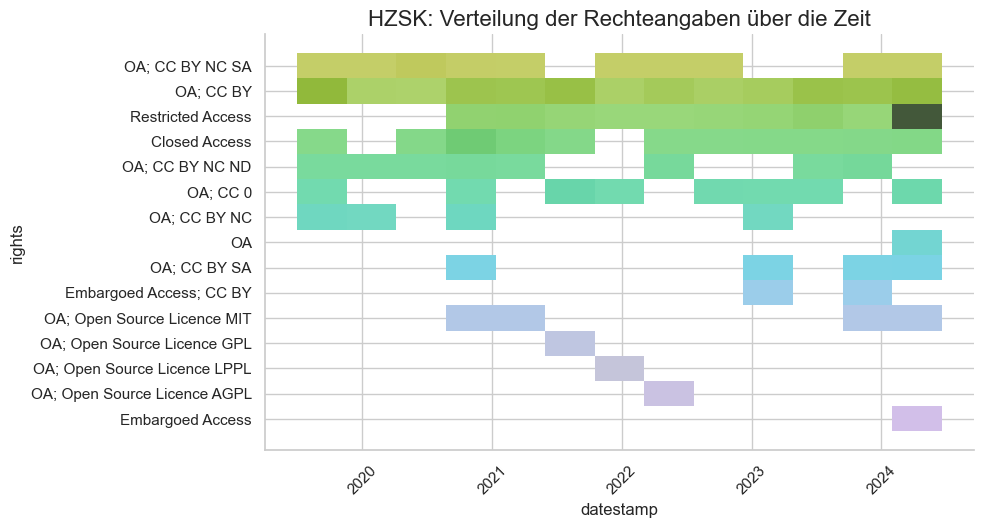

In [31]:

sns.displot(data_hzsk_grouped, x="datestamp", y="rights", hue="rights", aspect=2, palette='viridis_r', legend=False) # Verteilung der Rechteangaben über die Zeit
plt.xticks(rotation=45)
plt.title('HZSK: Verteilung der Rechteangaben über die Zeit', fontsize=16)
plt.show() 


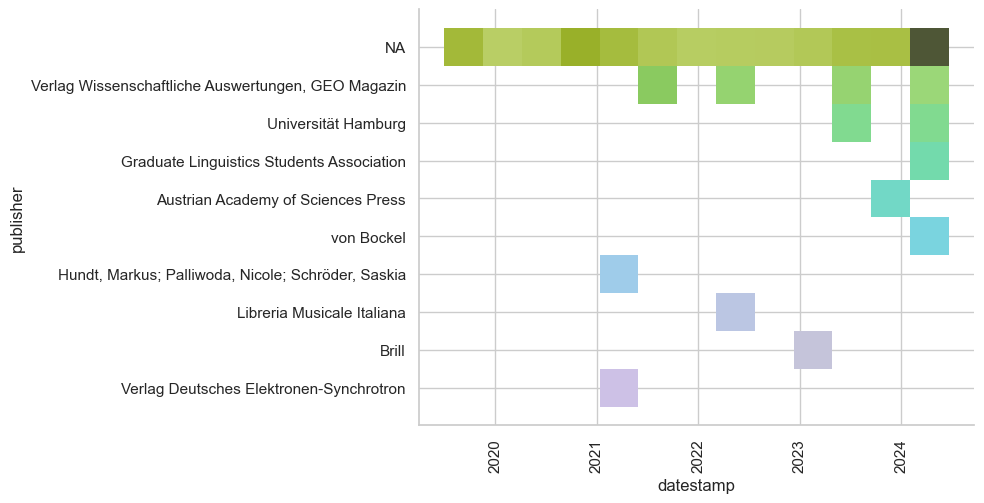

In [47]:
sns.displot(data_hzsk_grouped, x="datestamp", y="publisher", hue='publisher', aspect=2, palette='viridis_r', legend=False) 
plt.xticks(rotation=90)
plt.show()

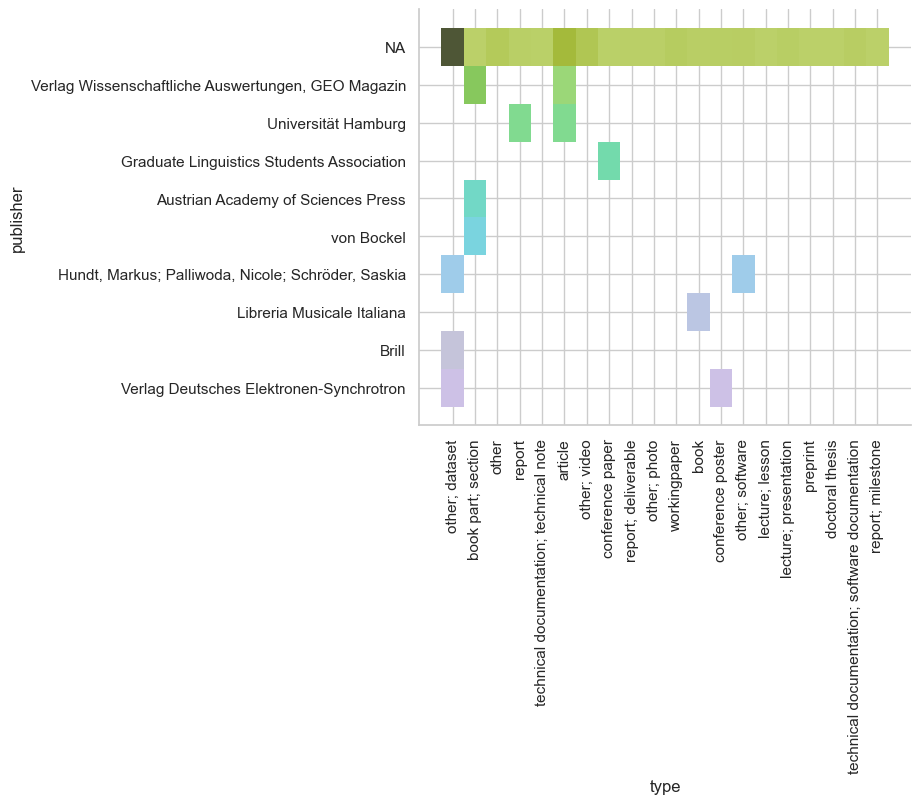

In [49]:
sns.displot(data_hzsk_grouped, x="type", y="publisher", hue='publisher', aspect=2, palette='viridis_r', legend=False) 
plt.xticks(rotation=90)
plt.show()